In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# tensorflow
import tensorflow as tf

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Resources/clean_spotify.csv", encoding='latin1')

# Review the DataFrame
df.head(20)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        89740 non-null  int64  
 1   track_id          89740 non-null  object 
 2   artists           89740 non-null  object 
 3   album_name        89740 non-null  object 
 4   track_name        89740 non-null  object 
 5   popularity        89740 non-null  int64  
 6   duration_ms       89740 non-null  int64  
 7   explicit          89740 non-null  bool   
 8   danceability      89740 non-null  float64
 9   energy            89740 non-null  float64
 10  key               89740 non-null  int64  
 11  loudness          89740 non-null  float64
 12  mode              89740 non-null  int64  
 13  speechiness       89740 non-null  float64
 14  acousticness      89740 non-null  float64
 15  instrumentalness  89740 non-null  float64
 16  liveness          89740 non-null  float6

In [4]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,89740.000000,89740.000000,8.974000e+04,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000
mean,53479.005739,33.198808,2.291444e+05,0.562166,0.634458,5.283530,-8.498994,0.636973,0.087442,0.328285,0.173415,0.216971,0.469474,122.058134,3.897426
std,33410.141924,20.580640,1.129458e+05,0.176692,0.256606,3.559912,5.221518,0.480875,0.113278,0.338321,0.323849,0.194885,0.262864,30.117651,0.453437
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23766.750000,19.000000,1.730400e+05,0.450000,0.457000,2.000000,-10.322250,0.000000,0.036000,0.017100,0.000000,0.098200,0.249000,99.262750,4.000000
50%,50680.500000,33.000000,2.132955e+05,0.576000,0.676000,5.000000,-7.185000,1.000000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000,4.000000
75%,80618.500000,49.000000,2.642930e+05,0.692000,0.853000,8.000000,-5.108000,1.000000,0.085900,0.625000,0.097625,0.279000,0.682000,140.077000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
#clean 
cols_remove = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'duration_ms', 'explicit', 'key', 'loudness', 'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo','time_signature']
df = df.drop(cols_remove, axis=1)
df.head()

,popularity,danceability,energy,acousticness
0,73,0.676,0.4610,0.0322
1,55,0.420,0.1660,0.9240
2,57,0.438,0.3590,0.2100
3,71,0.266,0.0596,0.9050
4,82,0.618,0.4430,0.4690


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    89740 non-null  int64  
 1   danceability  89740 non-null  float64
 2   energy        89740 non-null  float64
 3   acousticness  89740 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.7 MB


In [7]:
# Locate the column 'A' and change it from bool to int
#df.loc[:, 'explicit'] = df.loc[:, 'explicit'].astype(int)
#df.head()

In [8]:
#Check for multicollinearity
corrs = df.corr()
print(corrs)

              popularity  danceability    energy  acousticness
popularity      1.000000      0.064275  0.013725     -0.038828
danceability    0.064275      1.000000  0.143913     -0.177040
energy          0.013725      0.143913  1.000000     -0.732569
acousticness   -0.038828     -0.177040 -0.732569      1.000000


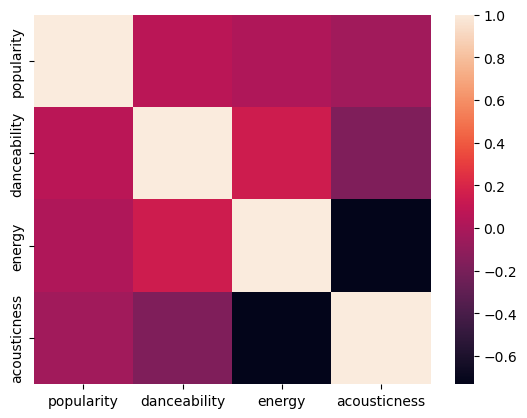

In [9]:
sns.heatmap(corrs)
plt.show()

In [13]:
df2 = df.iloc[0:300]
df2

,popularity,danceability,energy,acousticness
0,73,0.676,0.4610,0.0322
1,55,0.420,0.1660,0.9240
2,57,0.438,0.3590,0.2100
3,71,0.266,0.0596,0.9050
4,82,0.618,0.4430,0.4690
...,...,...,...,...
295,64,0.588,0.1420,0.8630
296,58,0.724,0.6520,0.4600
297,64,0.567,0.2240,0.8870
298,35,0.544,0.8390,0.7840


In [14]:
# Define batch size
batch_size = 300
features = ['popularity', 'danceability', 'energy', 'acousticness']
song_features = df2[features]
num_songs = len(song_features)
cosine_sim = csr_matrix((num_songs, num_songs))
for i in range(0, num_songs, batch_size):
    start = i
    end = min(i + batch_size, num_songs)
    sparse_batch = csr_matrix(song_features.iloc[start:end].values)
    batch_cosine_sim = cosine_similarity(sparse_batch, song_features.values)
    cosine_sim[start:end, :] = batch_cosine_sim
    
    

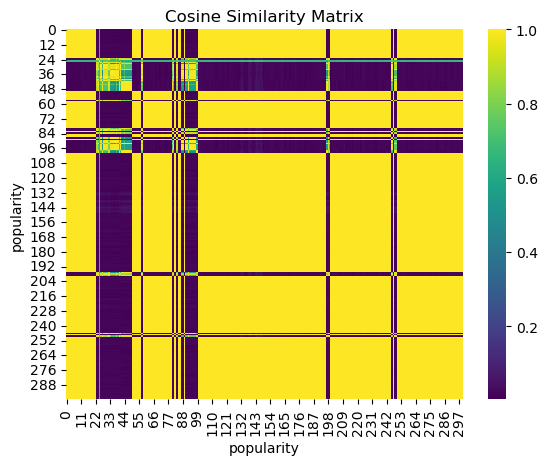

In [15]:
sns.heatmap(cosine_sim.toarray(), cmap='viridis')
plt.title('Cosine Similarity Matrix')
plt.xlabel('popularity')
plt.ylabel('popularity')
plt.show()

In [16]:
# Calculate cosine similarity between songs based on selected features
features = ['popularity', 'danceability', 'energy', 'acousticness']
song_features = df2[features]
sparse_song_features = csr_matrix(song_features.values)
cosine_sim = cosine_similarity(sparse_song_features, dense_output = False)
print(cosine_sim)


  (0, 249)	0.01062131542389375
  (0, 248)	0.01062131542389375
  (0, 246)	0.007493452352675523
  (0, 199)	0.010986019247673982
  (0, 198)	0.00925979011975525
  (0, 197)	0.011086795695987386
  (0, 99)	0.01061646854006209
  (0, 98)	0.010225967818660047
  (0, 97)	0.005788464671441024
  (0, 96)	0.005788464671441024
  (0, 95)	0.005788464671441024
  (0, 94)	0.005788464671441024
  (0, 93)	0.005788464671441024
  (0, 92)	0.010385982067706332
  (0, 91)	0.005788464671441024
  (0, 90)	0.005788464671441024
  (0, 88)	0.004990012808291286
  (0, 87)	0.004990012808291286
  (0, 84)	0.007907017343915782
  (0, 83)	0.007907017343915782
  (0, 81)	0.007624323874679252
  (0, 80)	0.009270739223642294
  (0, 57)	0.00788636811071862
  (0, 49)	0.010692899482650823
  (0, 48)	0.010692899482650823
  :	:
  (299, 50)	0.9997588338905359
  (299, 25)	0.667155985952305
  (299, 22)	0.9997748563341687
  (299, 21)	0.9998656411059555
  (299, 20)	0.9998898947390066
  (299, 19)	0.9998498794679038
  (299, 18)	0.9998984192943637
  

In [18]:
# Function to recommend similar songs based on selected song
def recommend_song(song_name):
    song_index = df[df['track_name'] == song_name].index[0]
    similar_songs = list(enumerate(cosine_sim[song_index]))
    similar_songs = sorted(similar_songs, key=lambda x: x[1], reverse=True)
    
    # Recommend top 5 similar songs
    recommended_songs = []
    for i in range(1, 6):  # Exclude the selected song itself
        song_idx = similar_songs[i][0]
        recommended_song = df.loc[song_idx, 'track_name']
        recommended_songs.append(recommended_song)
    
    return recommended_songs


In [19]:
Get recommendations for a selected song
selected_song = 'Despacito'
recommended_songs = recommend_song(selected_song)
print(f"Recommended songs based on '{selected_song}': {recommended_songs}")

KeyError: 'track_name'

In [ ]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['popularity']

# Separate the X variable, the features
X = df.drop(columns=['popularity'])

In [ ]:
# Review the y variable Series
y.head()

In [ ]:
# Review the X variable DataFrame
X.head()

In [ ]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)

In [ ]:
# We built this in class with my amazing Prof 
def doClassification(model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix: 
    {train_cm}

    Train Report: 
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix: 
    {test_cm}

    Test Report: 
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logreg = LogisticRegression(random_state=1)

# Fit the model using training data
logreg.fit(X_train, y_train)

In [ ]:
# Make a prediction using the testing data
traning_pred = logreg.predict(X_train)
traning_prob = logreg.predict_proba(X_train)

test_pred = logreg.predict(X_test)
test_prob = logreg.predict_proba(X_test)